# モデルの評価と改良

## 交差検証
汎化性能を評価する統計的手法。
*モデルを作るわけではなく、与えられたアルゴリズムがどの程度凡化できるかを評価する。

#### k分割交差検証
1. データをk分割。
2. 最初の分割をテストセットに残りを訓練セットにする
3. 次の分割をテストセット、残りを訓練セットをk回やる

#### 層化k分割交差検証
クラスの分布に偏りがある時、単純なk分割では精度が低くなる
クラスの比率が全体の比率と同じになるように分割する。

#### 一つ抜き交差検証
k分割交差検証の個々の分割が1サンプルしかないものだと考える。
毎回、テストセット中の1サンプルだけをテストセットとして検証する
*時間がかかるが、より良い推定が可能。

#### シャッフル分割交差検証
毎回trainとtestを選び出してテストセットとする。これをn回やる

#### グループ付き交差検証
訓練とテストのデータが被らないようにする。

In [1]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X,y = make_blobs(random_state=0)
X_train,X_test,y_train,y_test = train_test_split(X,y)
logreg = LogisticRegression().fit(X_train,y_train)

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(max_iter=1000)

scores = cross_val_score(logreg,iris.data,iris.target)
print(scores)

[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [3]:
scores = cross_val_score(logreg,iris.data,iris.target,cv=5)
scores

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

In [4]:
scores.mean()

0.9733333333333334

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
cross_val_score(logreg,iris.data,iris.target,cv=kfold)

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [7]:
kfold = KFold(n_splits=3)
cross_val_score(logreg,iris.data,iris.target,cv=kfold)

array([0., 0., 0.])

In [8]:
kfold = KFold(n_splits=3,shuffle=True,random_state=0)
cross_val_score(logreg,iris.data,iris.target,cv=kfold)

array([0.98, 0.96, 0.96])

In [9]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg,iris.data,iris.target,cv=loo)
print(len(scores))
print(scores.mean())

150
0.9666666666666667


In [10]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5,train_size=.5,n_splits=10)
scores = cross_val_score(logreg,iris.data,iris.target,cv=shuffle_split)
scores

array([0.97333333, 0.97333333, 0.98666667, 0.98666667, 0.93333333,
       0.93333333, 0.96      , 0.98666667, 1.        , 0.93333333])

In [11]:
from sklearn.model_selection import GroupKFold

X,y = make_blobs(n_samples=12,random_state=0)
groups = [0,0,0,1,1,1,1,2,2,3,3,3]
scores = cross_val_score(logreg,X,y,groups=groups,cv=GroupKFold(n_splits=3))
print(scores)


[0.75       0.6        0.66666667]


# グリッドサーチ
最適なパラメータを探すのは難しい。
グリッドサーチでパラメータの組み合わせを全て試す

# 検証セット
テストに対して最良のパラメータを探しても未知のデータに対して最良というわけではない
データを訓練、テスト、検証用の3セットに分ける




In [12]:
from sklearn.svm import SVC
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
print(X_train.shape[0],X_test.shape[0])
best_score=0

for gamma in [0.001,0.01,0.1,1,10,100]:
    for C in  [0.001,0.01,0.1,1,10,100]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_test,y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C,'gamma':gamma}
            
print(best_score)
print(best_parameters)

112 38
0.9736842105263158
{'C': 100, 'gamma': 0.001}


In [13]:
from sklearn.svm import SVC
X_trainval,X_test,y_trainval,y_test = train_test_split(iris.data,iris.target,random_state=0)
X_train,X_valid,y_train,y_valid=train_test_split(X_trainval,y_trainval,random_state=1)
print(X_train.shape[0],X_valid.shape[0],X_test.shape[0])
best_score=0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma,C=C)
        svm.fit(X_train,y_train)
        score = svm.score(X_valid,y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C,'gamma':gamma}
print(best_score)
print(best_parameters)

84 28 38
0.9642857142857143
{'C': 10, 'gamma': 0.001}


In [14]:
svm = SVC(C=100,gamma=0.01)
svm.fit(X_trainval,y_trainval)
print(svm.score(X_test,y_test))

0.9736842105263158


In [15]:
import numpy as np
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma,C=C)
        scores = cross_val_score(svm,X_trainval,y_trainval,cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C':C,'gamma':gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval,y_trainval)

SVC(C=10, gamma=0.1)

ValueError: The number of FixedLocator locations (21), usually from a call to set_ticks, does not match the number of ticklabels (36).

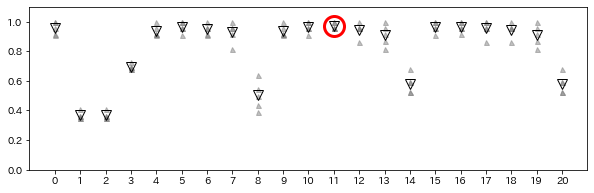

In [16]:
import mglearn
mglearn.plots.plot_cross_val_selection()

In [ ]:
mglearn.plots.plot_grid_search_overview()

In [17]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100],
             'gamma':[0.001,0.01,0.1,1,10,100]}

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(),param_grid,cv=5,return_train_score=True)
grid_search

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [20]:
grid_search.score(X_test,y_test)

0.9736842105263158

In [21]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9731225296442687
{'C': 10, 'gamma': 0.1}


In [22]:
grid_search.best_estimator_

SVC(C=10, gamma=0.1)

In [23]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001089,0.000178,0.000594,0.000081,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.003549,0.004605,0.001054,0.000762,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.000990,0.000122,0.000548,0.000012,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.000888,0.000041,0.000511,0.000079,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.000927,0.000071,0.000508,0.000045,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


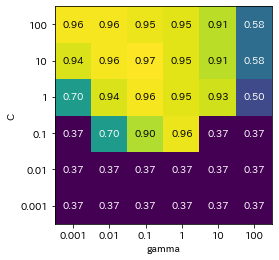

In [24]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

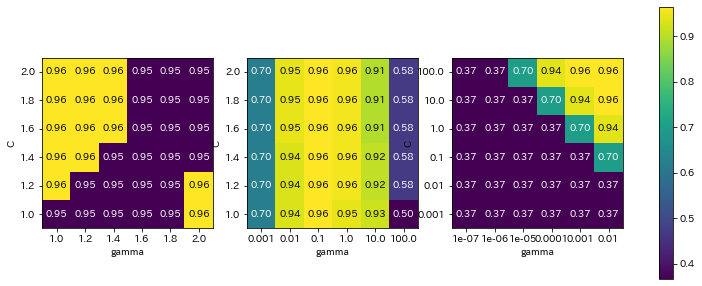

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

In [30]:
param_grid = [{'kernel':['rbf'],
              'C':[0.001,0.01,0.1,1,10,100],
              'gamma':[0.001,0.01,0.1,1,10,100],
              },{'kernel':['linear'],
                'C':[0.001,0.01,0.1,1,10,100]}]
param_grid

[{'kernel': ['rbf'],
  'C': [0.001, 0.01, 0.1, 1, 10, 100],
  'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
 {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

In [31]:
grid_search = GridSearchCV(SVC(),param_grid,cv=5,return_train_score=True)

grid_search.fit(X_train,y_train)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.9731225296442687


In [33]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00468,0.001128,0.000934,0.000903,0.000979,0.000986,0.001104,0.000906,0.000839,0.001298,...,0.000485,0.000601,0.000875,0.000979,0.000718,0.000689,0.00067,0.000596,0.000638,0.000475
std_fit_time,0.005558,0.000252,0.000085,0.00001,0.000101,0.000128,0.000339,0.000152,0.000136,0.000404,...,0.000057,0.000056,0.000062,0.000104,0.000115,0.000093,0.000169,0.000191,0.000128,0.000038
mean_score_time,0.002494,0.000597,0.000537,0.000541,0.000536,0.000585,0.00052,0.000526,0.000442,0.000621,...,0.000298,0.000341,0.000392,0.000437,0.000267,0.000328,0.00036,0.00031,0.000284,0.00022
std_score_time,0.002569,0.000115,0.000058,0.000082,0.00002,0.00009,0.000151,0.000093,0.000058,0.000224,...,0.000072,0.000068,0.000015,0.000029,0.000029,0.000081,0.00013,0.000121,0.000078,0.00001
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.869565,0.521739,0.347826,0.869565,1.0,1.0,1.0,0.956522
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,0.956522,0.956522,0.913043,0.521739,0.347826,0.869565,0.913043,0.956522,1.0,0.956522


In [35]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
scores = cross_val_score(GridSearchCV(SVC(),param_grid,cv=5),iris.data,iris.target,cv=5)
print(scores)
print(scores.mean())

[0.96666667 1.         0.96666667 0.96666667 1.        ]
0.9800000000000001


In [48]:
def nested_cv(X,y,inner_cv,outer_cv,Classifier,parameter_grid):
    outer_scores=[]
    for training_samples,test_samples in outer_cv.split(X,y):
        best_params = {}
        best_score = -np.inf
        
        for parameters in parameter_grid:
            cv_scores = []
            
            for inner_train,inner_test in inner_cv.split(X[training_samples],y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train],y[inner_train])
                score = clf.score(X[inner_test],y[inner_test])
                cv_scores.append(score)
            mean_score = np.mean(scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples],y[training_samples])
        outer_score = clf.score(X[test_samples],y[test_samples])
        outer_scores.append(outer_score)
    return np.array(outer_scores)


            

In [49]:
from sklearn.model_selection import ParameterGrid,StratifiedKFold
scores = nested_cv(iris.data,iris.target,StratifiedKFold(5),StratifiedKFold(5),SVC,ParameterGrid(param_grid))
print(scores)

[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
[  0   1   2   3   4   5   6   7   8   9  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  51  52  53  54  55  56  57  58  59  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
[  0   1   2   3   4   5

# 偏ったデータセット
2クラス分類で一方のクラスが他方のクラスよりずっと多い時、例えばCTRで100の広告を流して99をスルーして、1つの広告がクリックされる時などに最適なモデルはなんだろう。
全ての広告を「クリックされない」と判定するモデルが99%の精度のモデルになるがこれは正しくないが、検出できない。

### 混同行列
正確にクラス分類されたサンプルの個数と、誤った分類の個数を示す
TP:真陽性
TN:真陰性
FP:偽陽性
FN:偽陰性
精度はTP + TN / nで求められる

### 適合率、再現率、f値
適合率 = TP / TP + FP
再現率 = TP / TP + FN
f値 = 2 x (適合率 x 再現率) / (適合率 + 再現率)

### 多クラスの評価
ここのクラスに対して、そのクラスを陽性、他のクラスを陰性とする2クラスのf値を求める。
f値を次のようにして平均化する
macro平均：重みをつけずにクラスごとのf-値を平均する。クラスのサイズを考慮せずに、全てのクラスに同じ重みをつける
weighted平均：各クラスの支持度に応じて重みをつけて、クラスごとのf-値を平均する。
クラス分類レポートで表示されるのはこの値。
micro平均：全てのクラスの偽陽性、偽陰性、真陽性の総数尾を計算し、その値を用いて計算する。


In [50]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9
X_train,X_test,y_train,y_test = train_test_split(digits.data,y,random_state=0)

In [53]:
from sklearn.dummy import DummyClassifier
dumy_majority = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
pred_most_frequent = dumy_majority.predict(X_test)
print(pred_most_frequent)
print(np.unique(pred_most_frequent))
print(dumy_majority.score(X_test,y_test))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [60]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train,y_train)
pred_tree = tree.predict(X_test)
print(tree.predict(X_test))
print(tree.score(X_test,y_test))


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True False False False False False False
 False False False  True False False False False  True False False False
 False False  True False False False False False  True False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
  True False  True  True False False False False False False False  True
 False  True False False False  True False False False False False False
 False  True False False False False False False Fa

In [56]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train,y_train)
pred_dummy = dummy.predict(X_test)
print(dummy.score(X_test,y_test))

logreg = LogisticRegression(max_iter=1000,C=0.1).fit(X_train,y_train)
pred_logreg = logreg.predict(X_test)
print(logreg.score(X_test,y_test))

0.8955555555555555
0.9844444444444445


In [57]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,pred_logreg)
print(confusion)

[[402   1]
 [  6  41]]


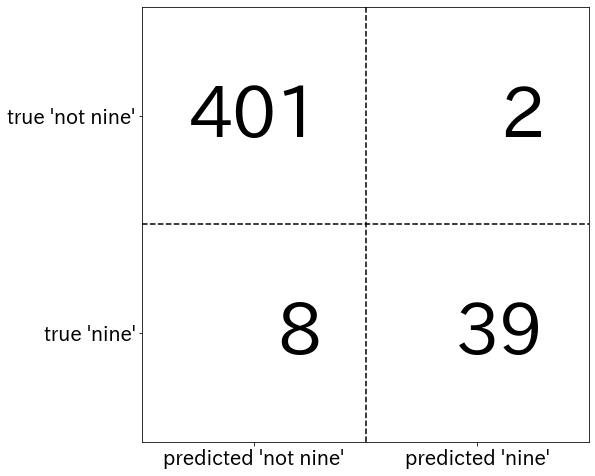

In [58]:
mglearn.plots.plot_confusion_matrix_illustration()

In [61]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


In [63]:
from sklearn.metrics import f1_score
print(f1_score(y_test,pred_most_frequent))
print(f1_score(y_test,pred_dummy))
print(f1_score(y_test,pred_tree))
print(f1_score(y_test,pred_logreg))

0.0
0.0
0.5542168674698795
0.9213483146067415


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_most_frequent,target_names=['not nine','nine']))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [68]:
print(classification_report(y_test,pred_dummy,target_names=['not_nine','nine']))

              precision    recall  f1-score   support

    not_nine       0.90      1.00      0.94       403
        nine       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [69]:
print(classification_report(y_test,pred_logreg,target_names=['not nine','nine']))

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



In [71]:
X,y = make_blobs(n_samples=(400,50),cluster_std=[7.0,2],
                random_state=22)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
svc = SVC(gamma=0.5).fit(X_train,y_train)


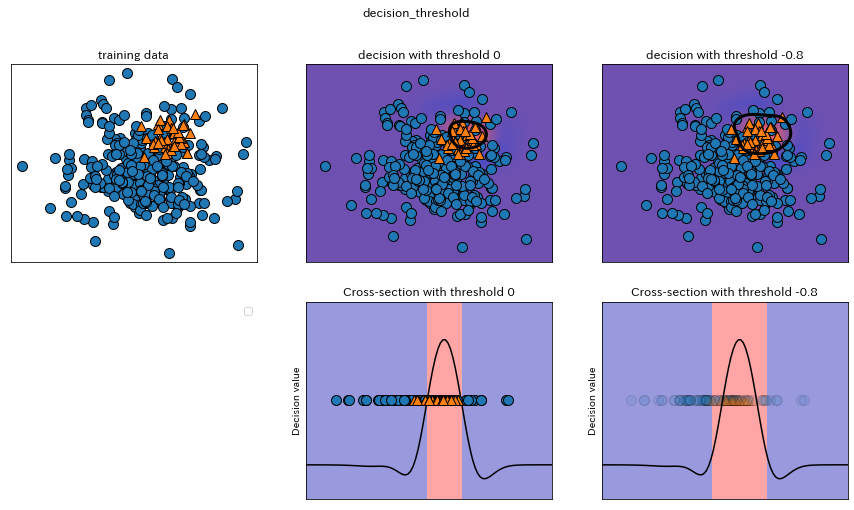

In [72]:
mglearn.plots.plot_decision_threshold()

In [73]:
print(classification_report(y_test,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       104
           1       0.20      0.33      0.25         9

    accuracy                           0.84       113
   macro avg       0.57      0.61      0.58       113
weighted avg       0.88      0.84      0.86       113



In [74]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [76]:
print(classification_report(y_test,y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89       104
           1       0.31      1.00      0.47         9

    accuracy                           0.82       113
   macro avg       0.66      0.90      0.68       113
weighted avg       0.95      0.82      0.86       113



In [79]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))


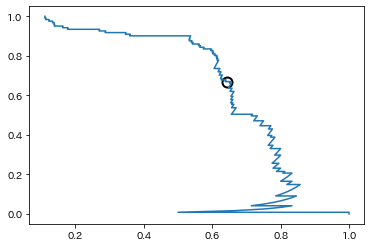

In [82]:
X,y = make_blobs(n_samples=(4000,500),cluster_std=[7.0,2],
                random_state=22)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
svc = SVC(gamma=0.05).fit(X_train,y_train)
precision,recall,thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',markersize=10,
        label="threshold zero", fillstyle="none",c='k',mew=2)
plt.plot(precision,recall,label="precision recall curve")

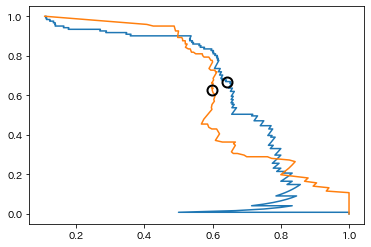

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=0,max_features=2)
rf.fit(X_train,y_train)

precision_rf, recall_rf,thresholds_rf = precision_recall_curve(
y_test,rf.predict_proba(X_test)[:,1])
plt.plot(precision,recall,label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf-0.5))
plt.plot(precision_rf[close_default_rf],recall_rf[close_default_rf],'o',markersize=10,c='k',label="threshold", fillstyle='none',mew=2)



In [94]:
print(f1_score(y_test,rf.predict(X_test)))
print(f1_score(y_test,svc.predict(X_test)))

0.6097560975609757
0.6558704453441295


In [96]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test,rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test,svc.decision_function(X_test))
print(ap_rf)
print(ap_svc)

0.659559370099291
0.6663140319391998


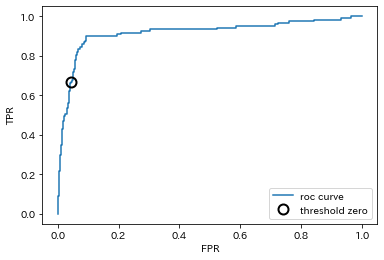

In [102]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,svc.decision_function(X_test))

plt.plot(fpr,tpr,label="roc curve")
plt.xlabel('FPR')
plt.ylabel('TPR')
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [105]:
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test  = train_test_split(digits.data,digits.target,random_state=0)
lr = LogisticRegression().fit(X_train,y_train)
pred = lr.predict(X_test)
print(accuracy_score(pred,y_test))
print(confusion_matrix(y_test,pred))


0.9511111111111111
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


/Users/watanabeyuitou/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


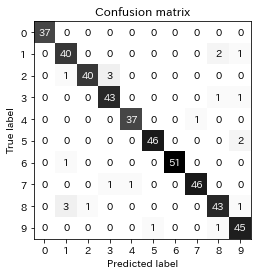

In [109]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [110]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [111]:
print(f1_score(y_test,pred,average='micro'))
print(f1_score(y_test,pred,average='macro'))

0.9511111111111111
0.9518965775741322
